In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
bd =  pd.read_csv('churn.csv')
bd.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
bd.shape

(10000, 14)

In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bd.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
bd.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
bd.drop(['RowNumber','CustomerId','Exited'],axis=1).describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


# Round the number to the nearest thousand
rounded = round(250898.090000 / 100000) * 100000

# Print the rounded number
print(rounded)


In [8]:
bd['Age'].nunique()

70

In [9]:
bd['Tenure'].nunique()

11

In [10]:
bd['NumOfProducts'].nunique()

4

In [11]:
bd['CreditScore'].nunique()

460

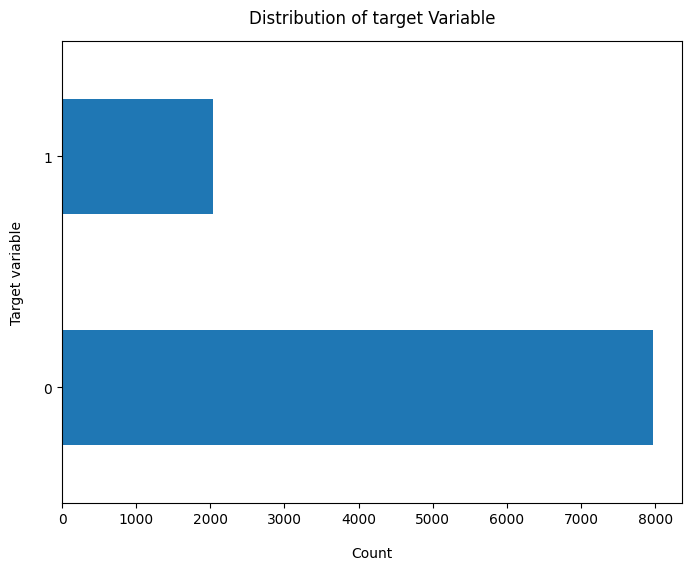

In [12]:
bd['Exited'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target variable",labelpad=14)
plt.title("Distribution of target Variable", y=1.02);

In [13]:
100*bd['Exited'].value_counts()/len(bd['Exited'])

0    79.63
1    20.37
Name: Exited, dtype: float64

Data is highly Imbalanced

In [14]:
bd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
bd.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data cleaning

In [16]:
bank_data = bd.copy()

In [17]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
print("Maximum Tenure value is {}".format(bank_data['Tenure'].max()))
print("Maximum Age value of customer is {}".format(bank_data['Age'].max()))
print("Maximum Est.salary value is {}".format(bank_data['EstimatedSalary'].max()))
print("Maximum Balance is {}".format(bank_data['Balance'].max()))
print("Maximum creditScore is {}".format(bank_data['CreditScore'].max()))

Maximum Tenure value is 10
Maximum Age value of customer is 92
Maximum Est.salary value is 199992.48
Maximum Balance is 250898.09
Maximum creditScore is 850


In [19]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
bank_data['Age'].max()

92

In [22]:
# Select rows where the value in the 'A' column is above 90
#df_filtered = bank_data[bank_data['Age'] > 80]
#df_filtered


In [23]:
# Check if the values 3 and 4 exist in the 'A' column
#exists = bank_data['Age'].isin([95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105]).any()
#print(exists)
#exists

In [21]:
bank_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
ten = ["{0} - {1}".format(i, i+2) for i in range(0, 12, 2)]
print(ten)

['0 - 2', '2 - 4', '4 - 6', '6 - 8', '8 - 10', '10 - 12']


In [23]:
bank_data['tenure_group'] = pd.cut(bank_data.Tenure, range(0, 14, 2), right=False, labels=ten)

In [24]:
bank_data['tenure_group'].value_counts()

2 - 4      2057
8 - 10     2009
4 - 6      2001
6 - 8      1995
0 - 2      1448
10 - 12     490
Name: tenure_group, dtype: int64

In [25]:
#Age bins
label_age = ["{0} - {1}".format(i, i+15) for i in range(18,92,15)]
print(label_age)

['18 - 33', '33 - 48', '48 - 63', '63 - 78', '78 - 93']


In [26]:
bank_data['age_group']= pd.cut(bank_data.Age, range(18,94,15), right= False, labels= label_age )

In [27]:
bank_data['age_group'].value_counts()

33 - 48    5500
18 - 33    2790
48 - 63    1351
63 - 78     335
78 - 93      24
Name: age_group, dtype: int64

In [28]:
bank_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_group,age_group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,4 - 6,33 - 48
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,10 - 12,33 - 48
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,6 - 8,33 - 48
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2 - 4,33 - 48
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,4 - 6,18 - 33


In [29]:
bank_data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
tenure_group       category
age_group          category
dtype: object

In [30]:
#droppping columns not needed
bank_data.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 
                          'Geography','Age', 'Tenure'],axis = 1, inplace = True)
bank_data.head()

,CreditScore,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,tenure_group,age_group
0,619,Female,0.00,1,1,1,101348.88,1,2 - 4,33 - 48
1,608,Female,83807.86,1,0,1,112542.58,0,0 - 2,33 - 48
2,502,Female,159660.80,3,1,0,113931.57,1,8 - 10,33 - 48
3,699,Female,0.00,2,0,0,93826.63,0,0 - 2,33 - 48
4,850,Female,125510.82,1,1,1,79084.10,0,2 - 4,33 - 48


## Exploratory Data Ananlysis

### Univariate Analysis
Plot individual columns

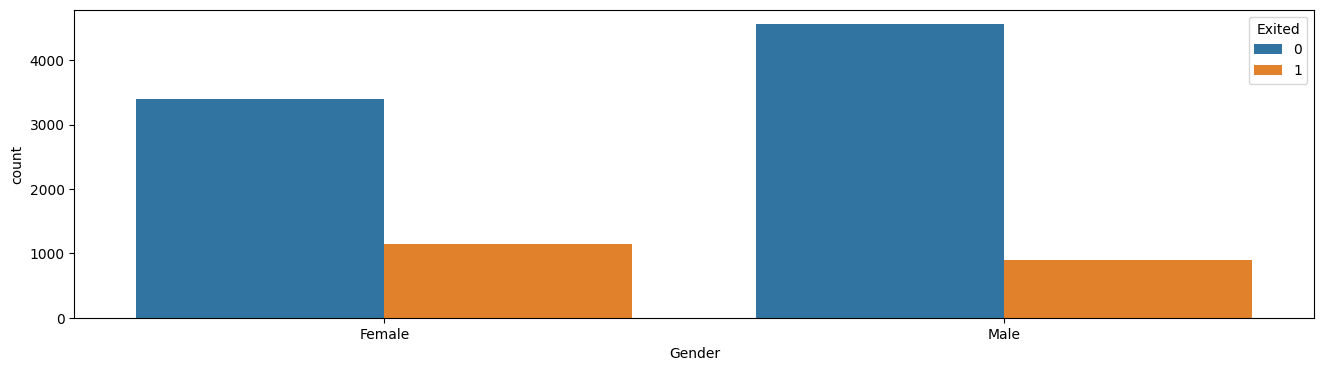

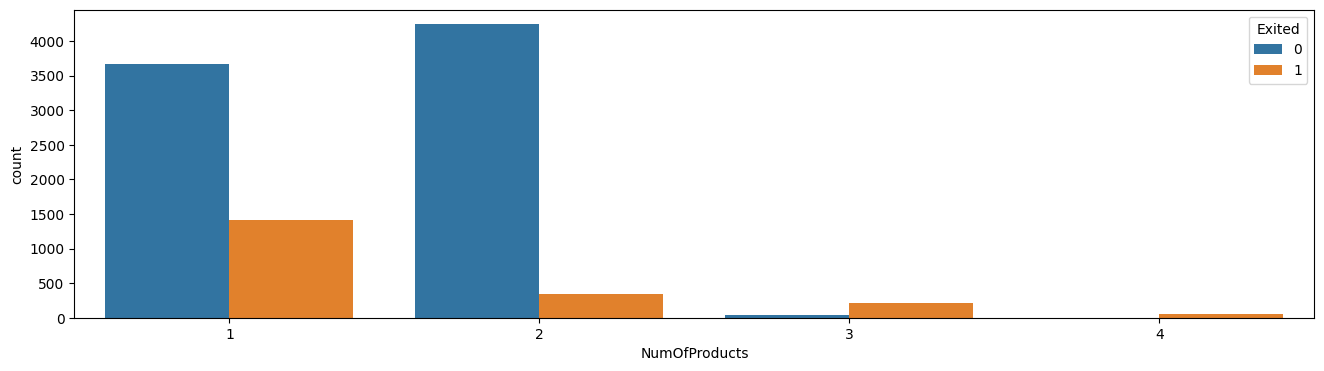

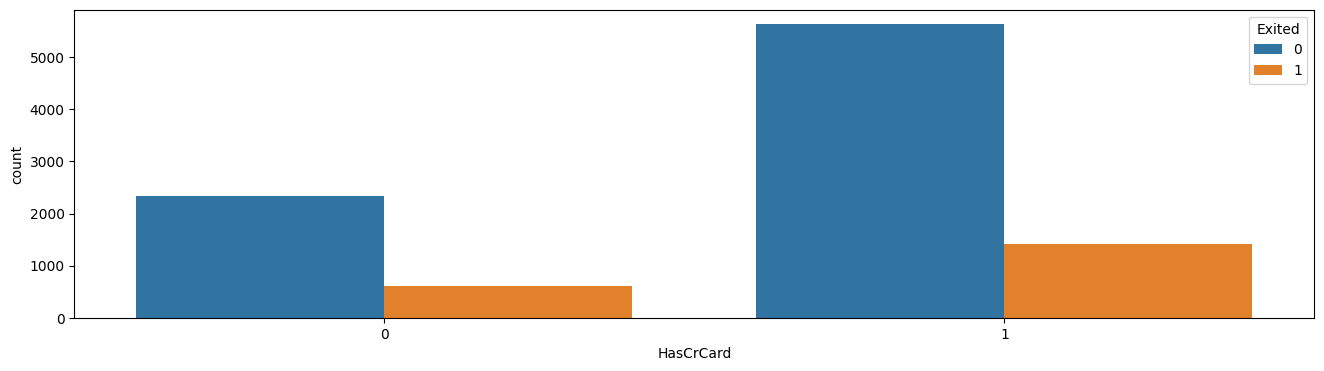

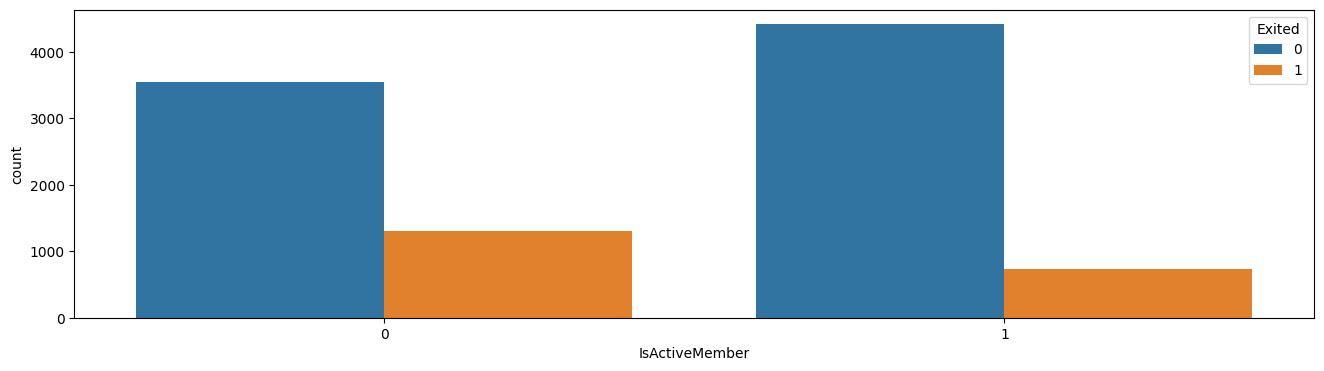

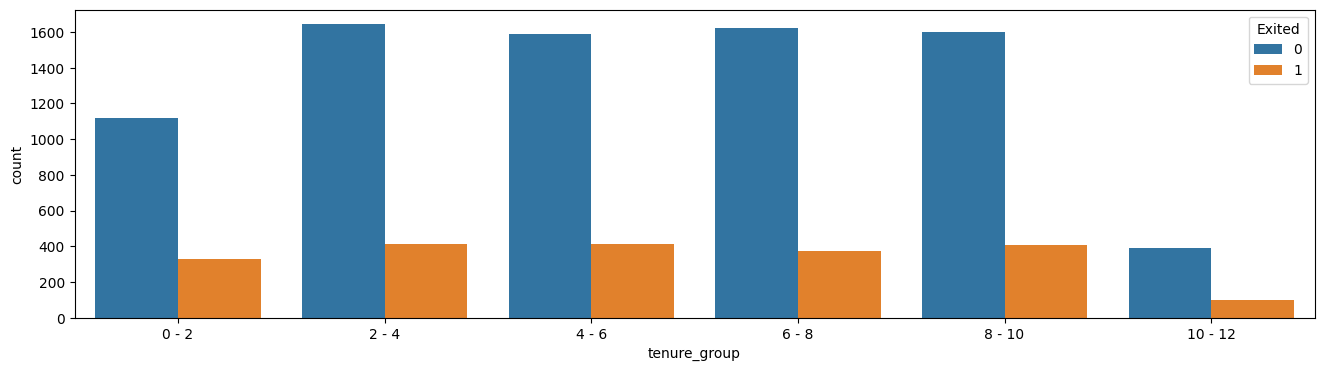

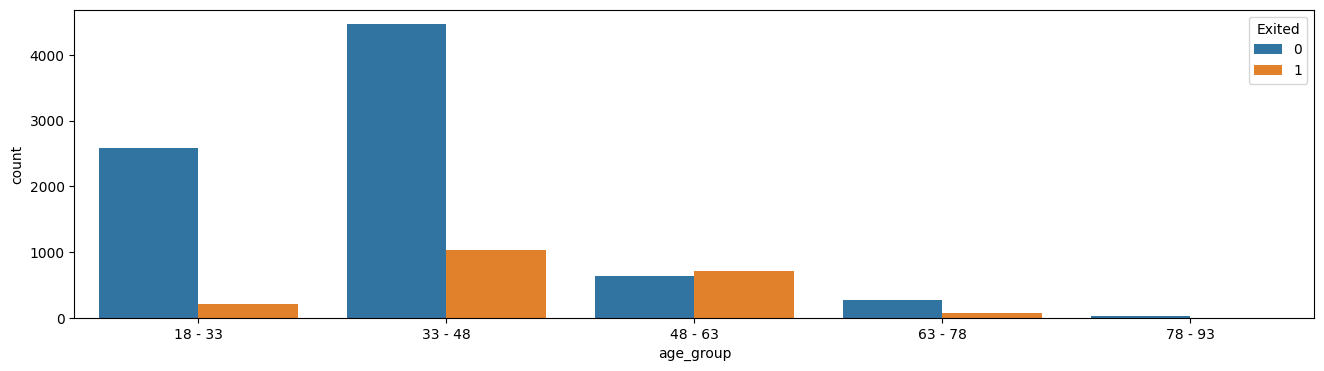

In [32]:
for i, predictor in enumerate(bank_data.drop(columns=['Exited','Balance','CreditScore','EstimatedSalary'])):
    plt.figure(i, figsize=(16, 4))
    sns.countplot(data= bank_data, x = predictor, hue= 'Exited')

In [32]:
bank_data_new = pd.get_dummies(bank_data)
bank_data_new.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,tenure_group_0 - 2,tenure_group_2 - 4,tenure_group_4 - 6,tenure_group_6 - 8,tenure_group_8 - 10,tenure_group_10 - 12,age_group_18 - 33,age_group_33 - 48,age_group_48 - 63,age_group_63 - 78,age_group_78 - 93
0,619,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,608,83807.86,1,0,1,112542.58,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,502,159660.80,3,1,0,113931.57,1,1,0,0,0,0,0,1,0,0,1,0,0,0
3,699,0.00,2,0,0,93826.63,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,850,125510.82,1,1,1,79084.10,0,1,0,0,1,0,0,0,0,0,1,0,0,0


def plot(df,col,title,hue=None):    
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"]=20
    plt.rcParams["axes.titlesize"]=22
    plt.rcParams["axes.titlepad"]=30
    
    temp = pd.series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, pallete = 'bright')
    
    plt.show()

In [33]:
mod_data = bank_data_new
mod_data.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,tenure_group_0 - 2,tenure_group_2 - 4,tenure_group_4 - 6,tenure_group_6 - 8,tenure_group_8 - 10,tenure_group_10 - 12,age_group_18 - 33,age_group_33 - 48,age_group_48 - 63,age_group_63 - 78,age_group_78 - 93
0,619,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,0,0,0,1,0,0,0
1,608,83807.86,1,0,1,112542.58,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,502,159660.80,3,1,0,113931.57,1,1,0,0,0,0,0,1,0,0,1,0,0,0
3,699,0.00,2,0,0,93826.63,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,850,125510.82,1,1,1,79084.10,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [34]:
mod_data.shape

(10000, 20)

## Modelling

In [35]:
#importing needed libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from joblib import Parallel, delayed

In [36]:
#setting my x variable
x = mod_data.drop('Exited',axis = 1)
x

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,tenure_group_0 - 2,tenure_group_2 - 4,tenure_group_4 - 6,tenure_group_6 - 8,tenure_group_8 - 10,tenure_group_10 - 12,age_group_18 - 33,age_group_33 - 48,age_group_48 - 63,age_group_63 - 78,age_group_78 - 93
0,619,0.00,1,1,1,101348.88,1,0,0,1,0,0,0,0,0,1,0,0,0
1,608,83807.86,1,0,1,112542.58,1,0,1,0,0,0,0,0,0,1,0,0,0
2,502,159660.80,3,1,0,113931.57,1,0,0,0,0,0,1,0,0,1,0,0,0
3,699,0.00,2,0,0,93826.63,1,0,1,0,0,0,0,0,0,1,0,0,0
4,850,125510.82,1,1,1,79084.10,1,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.00,2,1,0,96270.64,0,1,0,0,1,0,0,0,0,1,0,0,0
9996,516,57369.61,1,1,1,101699.77,0,1,0,0,0,0,0,1,0,1,0,0,0
9997,709,0.00,1,0,1,42085.58,1,0,0,0,0,1,0,0,0,1,0,0,0
9998,772,75075.31,2,1,0,92888.52,0,1,0,1,0,0,0,0,0,1,0,0,0


In [37]:
#setting my y variable
y = mod_data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
#splitting dataset for tree based
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify = y, random_state= 42)

In [39]:
#splitting dataset for distance based
x_train_dist, x_test_dist, y_train_dist, y_test_dist = train_test_split(x, y, test_size= 0.2, stratify = y, random_state= 42)

### Scaling for distance based model

In [40]:
# Standardization
sc = StandardScaler()

In [41]:
x_train_dist = sc.fit_transform(x_train_dist)
x_test_dist = sc.fit_transform(x_test_dist)

## Hyper Parameter Tunning

### Trees Model

In [45]:
# Parameters for Decision Tree Classifier
params_dt = {"max_depth": randint(5,15),
              "min_samples_split": randint(2,11),
              "min_samples_leaf": randint(1,11)}

# Parameters for Random Forest
params_rf = {"n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

#Parameters for Gradient Boosting
params_gbc = {"learning_rate": uniform(0.05, 0.3),
             "n_estimators": randint(50,150),
             "max_depth": randint(5,15),
             "min_samples_split": randint(2,11),
             "min_samples_leaf": randint(1,11)}

# Define the models and the parameter grid
models = [("DecisionTree", DecisionTreeClassifier(), params_dt),
          ("RandomForest", RandomForestClassifier(), params_rf),
          ("GradientBoosting", GradientBoostingClassifier(), params_gbc)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train, y_train)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")


Best parameters for DecisionTree : {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 9}
Best score for DecisionTree : 0.8423749638196951
Best parameters for RandomForest : {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 144}
Best score for RandomForest : 0.8481253703002053
Best parameters for GradientBoosting : {'learning_rate': 0.06072745507558452, 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 144}
Best score for GradientBoosting : 0.8498750109349609


### Distance Models

In [48]:
# Parameters for Logistic Regression
params_lr = {"C": uniform(0.1, 10), "penalty":["l1","l2"]}

# Parameters for SVM
params_svm = {"C": uniform(0.1,10), "kernel": ['linear', 'rbf']}

# Parameters for KNN
params_knn = {"n_neighbors": randint(3,20)}

# Define the models and the parameter grid
models = [("LogisticRegression", LogisticRegression(), params_lr),
          ("SVM", svm.SVC(), params_svm),
          ("KNN", KNeighborsClassifier(), params_knn)]

# train the models using parallel computing
for name, model, params in models:
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=3, random_state=4, n_iter=10, n_jobs=-1)
    random_search.fit(x_train_dist, y_train_dist)
    print(f"Best parameters for {name} : {random_search.best_params_}")
    print(f"Best score for {name} : {random_search.best_score_}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Value

Best parameters for LogisticRegression : {'C': 9.770298390136766, 'penalty': 'l2'}
Best score for LogisticRegression : 0.8263752289778482
Best parameters for SVM : {'C': 7.084202359093901, 'kernel': 'rbf'}
Best score for SVM : 0.8461255265072362
Best parameters for KNN : {'n_neighbors': 12}
Best score for KNN : 0.824750385196599


## Evaluate model

In [81]:
def eval_model(model, xtest, ytest, name):
    ypred = model.predict(xtest)
    
    accuracy = np.round(accuracy_score(ytest, ypred),4)
    balanced_accuracy = np.round(balanced_accuracy_score(ytest, ypred),4)
    precision = np.round(precision_score(ytest, ypred),4)
    recall = np.round(recall_score(ytest, ypred),4)
    f1score = np.round(f1_score(ytest, ypred),4)
    
    return accuracy, balanced_accuracy, precision, recall,f1score 

### Writing a function for model fitting and model evaluation (Tree based model)

## Fit Model

In [141]:
#model fitting
def model_fit_data(xtrain, ytrain, xtest, ytest):

    #Decision Tree
    DCT= DecisionTreeClassifier(criterion= 'entropy', 'max_depth'= 7, 'min_samples_leaf'= 10, 'min_samples_split'= 9)
    DCT.fit(xtrain, ytrain)
    
    #Random Forest
    RF= RandomForestClassifier(n_estimators= 144, criterion = 'gini', 
                               max_depth = 13, min_samples_leaf= 3, min_samples_split= 9)
    RF.fit(xtrain, ytrain)
    

    #Gradient Boosted Decision Trees
    GBDT = GradientBoostingClassifier(n_estimators=144, learning_rate= 0.06072745507558452, 
                                      max_depth=5, min_samples_leaf= 8, 'min_samples_split'= 4)
    GBDT.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Decision Trees': DCT,
        'Random Forest': RF,
        'Gradient Boosted Decision Trees': GBDT}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [ ]:
tree_models_scores= model_fit_data(x_train, y_train, x_test, y_test)
tree_models_scores

## Distance Based models

## Fitting Distanced based models

In [114]:
#model fitting
def model_fit_dist(xtrain, ytrain, xtest, ytest):
    
    #Logistic regression
    LG = LogisticRegression('C': 9.770298390136766, 'penalty': 'l2')
    LG.fit(xtrain, ytrain)
    
    
    #SVM
    SVM = svm.SVC(kernel='rbf', gamma=0.1, 'C': 7.084202359093901)
    SVM.fit(xtrain, ytrain)
    
    #KNN
    KNN = KNeighborsClassifier(n_neighbors=12, metric='manhattan', weights='uniform')
    KNN.fit(xtrain, ytrain)
    
    
    #creating an empty list to store my classifier scores
    performance_list = []
    
    #metrics to be used for evaluation of my models
    
    performance_metrics = ['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score']
    
    indices= []
    
    #creating a dictionary to store my models
    
    model_dict = {
        'Logistic Regression': LG,
        'Scalar Vector Machine': SVM,
        'KNeighbors Classifier': KNN}
    
    
    #Evaluating the model stored in my dictionary
    
    for name, model in model_dict.items():
        performance = eval_model(model, xtest, ytest, name)
        performance_list.append(performance)
        indices.append(name)
    
    performance_score = pd.DataFrame(performance_list, columns = performance_metrics, index = indices)
    return performance_score
   


    

In [ ]:
distance_models_scores= model_fit_dist(x_train_dist, y_train_dist, x_test_dist, y_test_dist)
distance_models_scores

In [ ]:
model_scores = pd.concat([tree_models_scores, distance_models_scores])
model_scores

In [ ]:
sns.heatmap(model_scores, annot = True, cmap= 'Blues')
plt.xlabel('Metrics')
plt.ylabel('Classifiers')

In [ ]:
model_scores.to_csv('model_scores.csv')

### Visualizing Confusion matrix

In [196]:
def confusion(models,X_train, y_train, X_test, y_test, classes):
    """
    This function takes in a dictionary of models, training data, test data, true labels, class labels and cmap
    as parameters. It trains each model with provided hyperparameters, creates a confusion matrix and visualizes it.
    """
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy : ", accuracy)
        conf_mat = confusion_matrix(y_test, y_pred)
        confusion_matrix_display = ConfusionMatrixDisplay(conf_mat, display_labels=classes)
        confusion_matrix_display.plot()
        plt.title(f"{name} Confusion Matrix")
        plt.show()


## Tree Models

Accuracy :  0.851


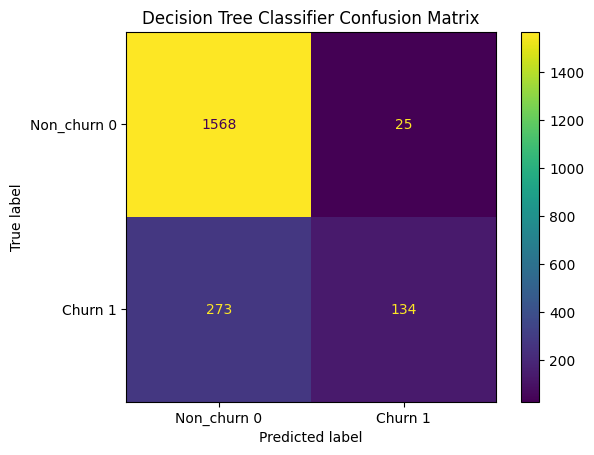

Accuracy :  0.85


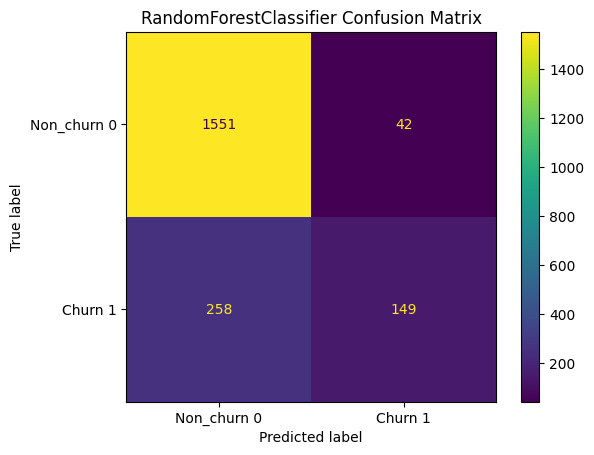

Accuracy :  0.854


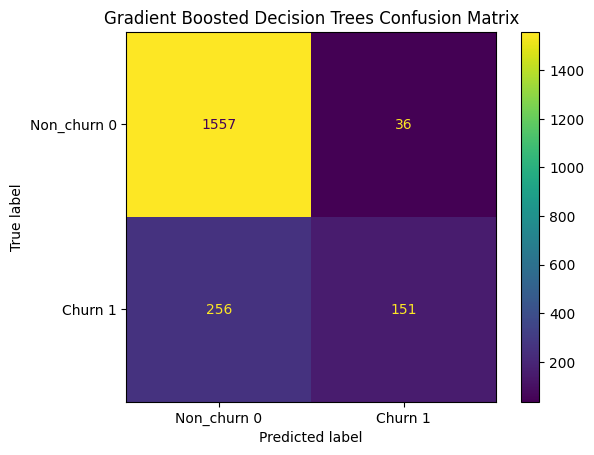

In [199]:
model_tree = {'Decision Tree Classifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, 
                                                             min_samples_leaf= 6, min_samples_split= 2),
          
          'RandomForestClassifier': RandomForestClassifier(n_estimators= 50, criterion = 'gini', 
                               max_depth = 10, min_samples_leaf= 2, min_samples_split= 10),
          
         'Gradient Boosted Decision Trees': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                                                       max_depth=3, min_samples_leaf= 8)}

confusion(model_tree2,x_train, y_train, x_test, y_test, classes= ["Non_churn 0","Churn 1"])

## Distance based models

Accuracy :  0.824


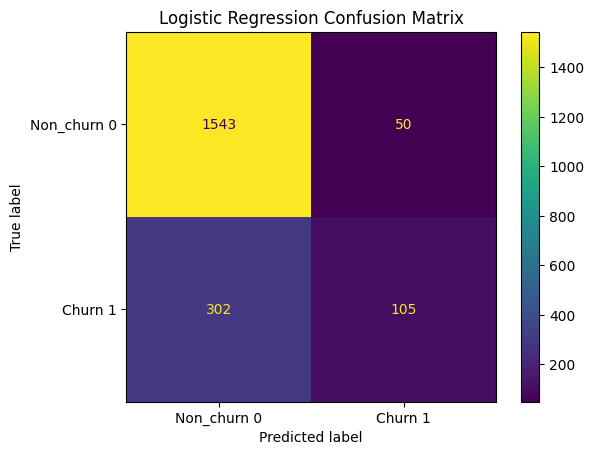

Accuracy :  0.8535


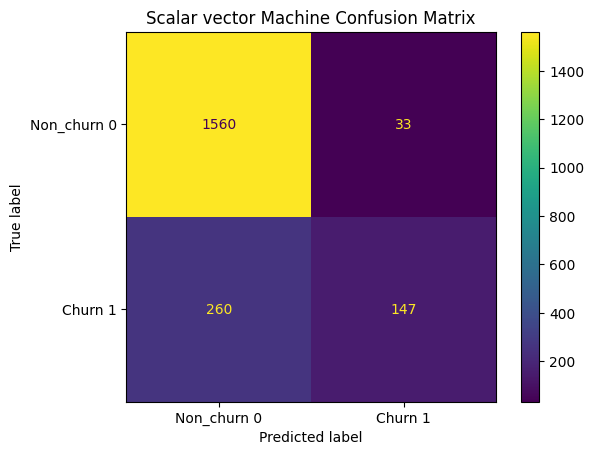

Accuracy :  0.8005


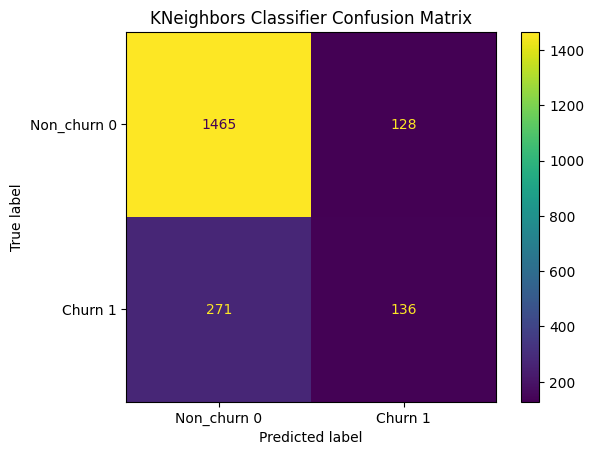

In [200]:
model_dist2 = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

confusion(model_dist2,x_train_dist, y_train_dist, x_test_dist, y_test_dist, classes= ["Non_churn 0","Churn 1"])

## Plotting ROC AUC

In [242]:
def roc_auc(models, X_train, y_train, X_test, y_test):
    """
    This function takes in a dictionary of models, training data, test data and true labels
    as parameters. It trains each model with provided hyperparameters, 
    predicts the probabilities of the test set, and plots the ROC-AUC curve for each model.
    """
    plt.style.use('seaborn-whitegrid')
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
        auc = roc_auc_score(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr,tpr,label=f"{name} (AUC={auc:.2f})", linestyle='-')
        plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='-',label="Random Classifier (AUC = 0.5)")
        plt.legend(loc='lower right', borderaxespad=0., frameon=True, edgecolor='black', bbox_to_anchor=(1.2,0))
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC-AUC Curve for {name}")
    plt.show()


## Tree Models

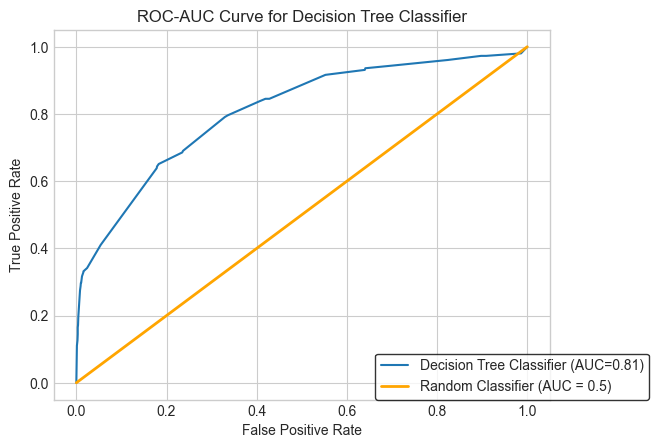

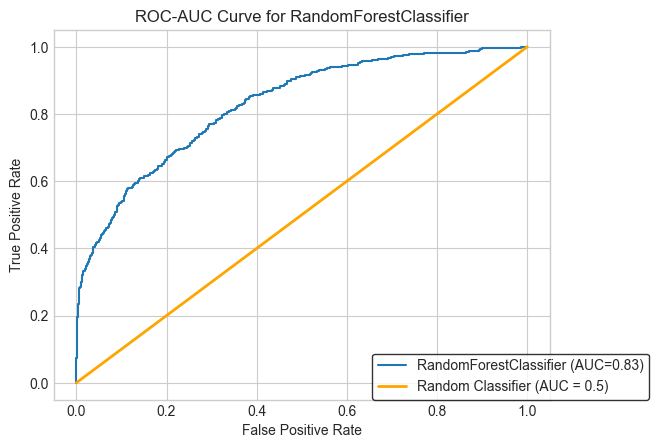

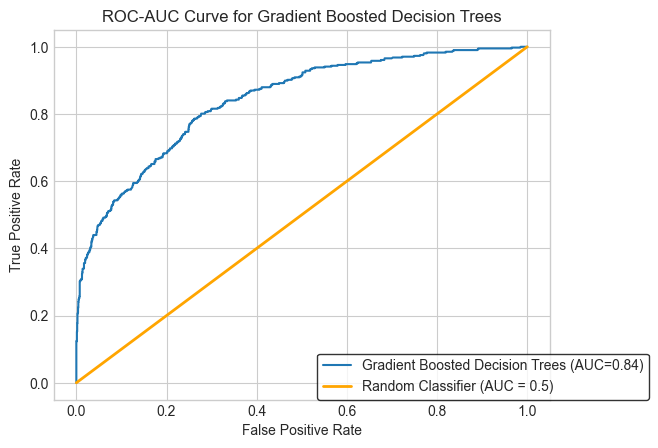

In [243]:
roc_auc(model_tree, x_train, y_train, x_test, y_test)

## Distance based

In [245]:
#Set prob to True in SVM
model_dist2 = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1, probability = True),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

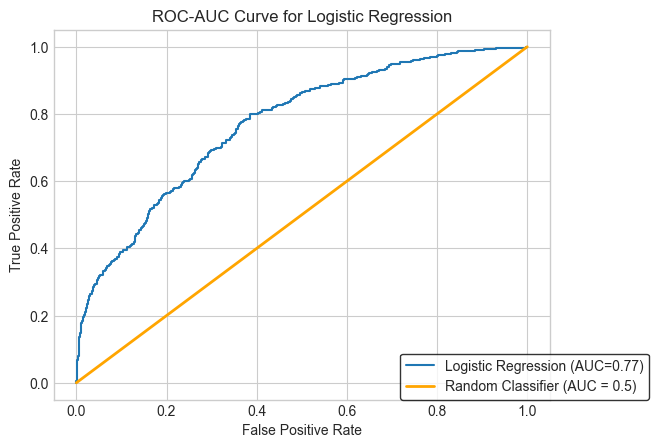

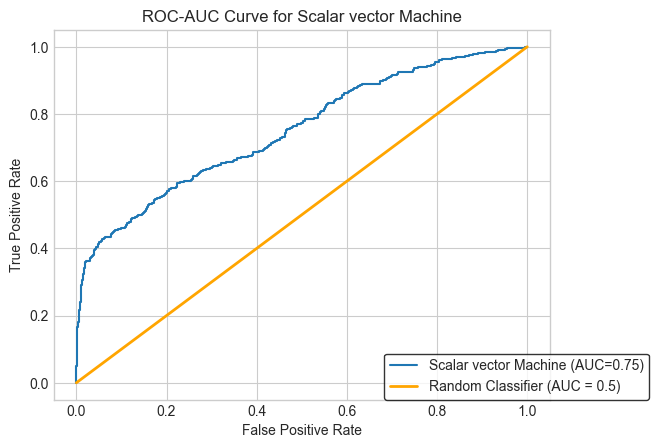

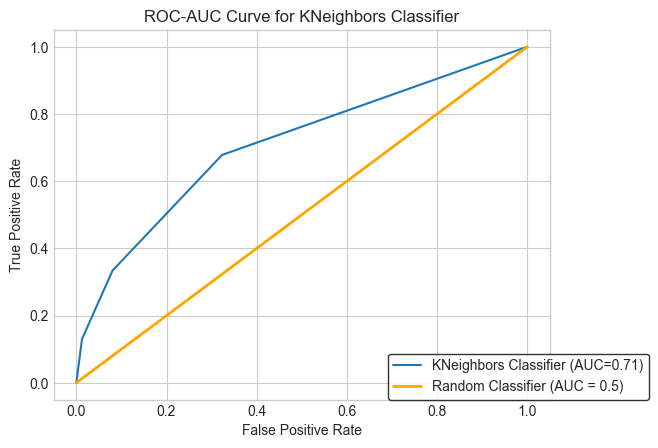

In [246]:
roc_auc(model_dist3,x_train_dist, y_train_dist, x_test_dist, y_test_dist)

## Decision Tree Classifier

dt= DecisionTreeClassifier(criterion= 'entropy', max_depth= 6,  min_samples_leaf= 6, min_samples_split= 2)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

y_pred

print(classification_report(y_test, y_pred, labels = [0,1]))

print(confusion_matrix(y_test, y_pred))

### Gradient Boosted Decision Tree

gbdt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)

gbdt_clf.fit(x_train, y_train)

y_pred_gbdt = gbdt_clf.predict(x_test)

print(classification_report(y_test, y_pred_gbdt, labels = [0,1]))

print(confusion_matrix(y_test, y_pred_gbdt))

### Random Forest

rf_clf = RandomForestClassifier(n_estimators= 50, criterion = 'gini' ,max_depth = 10, min_samples_leaf= 2, min_samples_split= 10 )

rf_clf.fit(x_train, y_train)

y_pred_rf = rf_clf.predict(x_test)

print(classification_report(y_test, y_pred_rf, labels = [0,1]))

print(confusion_matrix(y_test, y_pred_rf))

### Gradient Boosting Classifier

gbc_clf= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_leaf= 8)

gbc_clf.fit(x_train, y_train)

y_pred_gbc = gbc_clf.predict(x_test)

print(classification_report(y_test, y_pred_gbc, labels = [0,1]))

print(confusion_matrix(y_test, y_pred_gbc))

labels = [0,1]

#This function takes in a dictionary of models, training data, test data, true labels, class labels and cmap 
#as parameters. It trains each model with provided hyperparameters, creates a confusion matrix and visualizes it.
    
def visualize_confusion_matrix(models,X_train, y_train, X_test, y_test, classes = labels, cmap=plt.cm.Blues):
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy : ", accuracy)
        plt.figure()
        plot_confusion_matrix(model, X_test, y_test, cmap=cmap, values_format='d')
        plt.title(f"{name} Confusion Matrix")
        plt.show()


model_tree = {'Decision Tree Classifier': DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, 
                                                             min_samples_leaf= 6, min_samples_split= 2),
          
          'RandomForestClassifier': RandomForestClassifier(n_estimators= 50, criterion = 'gini', 
                               max_depth = 10, min_samples_leaf= 2, min_samples_split= 10),
          
         'Gradient Boosted Decision Trees': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                                                       max_depth=3, min_samples_leaf= 8)}

visualize_confusion_matrix(model_tree,x_train, y_train, x_test, y_test, classes,  cmap=plt.cm.Blues)

model_dist = {'Logistic Regression': LogisticRegression(random_state=100),
          
          'Scalar vector Machine':svm.SVC(kernel='rbf', gamma=0.1),
          
         'KNeighbors Classifier': KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')}

visualize_confusion_matrix(model_dist,x_train_dist, y_train_dist, x_test_dist, y_test_dist, classes,  cmap=plt.cm.Blues)